In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
from scipy import stats
import statsmodels.api as smf
import statsmodels.formula as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [59]:
df=pd.read_csv("C:\\Users\\91892\\Downloads\\course\\assig 6 logistic regression\\bank.csv",sep=";")

In [60]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [61]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [62]:
df=df.dropna()

In [63]:
df.shape

(45211, 17)

In [64]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [65]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [66]:
df=df.drop_duplicates()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


<AxesSubplot:xlabel='y', ylabel='count'>

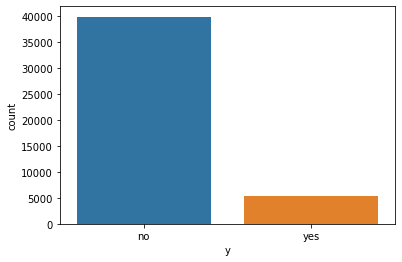

In [68]:
sns.countplot(x="y",data=df)

In [69]:
data1=df[df['y']== 'yes']
data2=df[df['y']== 'no']

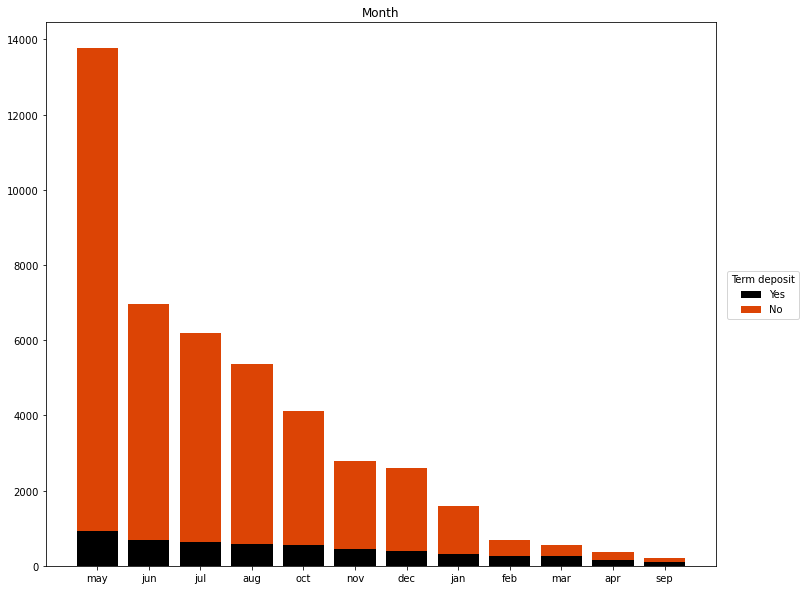

In [70]:
fig, ax= plt.subplots( figsize=(12,10))
ax.bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax.bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax.title.set_text("Month")
plt.figlegend( ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [71]:
predictors = df.iloc[:,0:16]
predictors = predictors.drop(['pdays'],axis=1)
y = df.iloc[:,16]
x = pd.get_dummies(predictors)

In [72]:
x.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [73]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
model= LogisticRegression(random_state=0,multi_class='auto',max_iter=3000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [77]:
y_pred=model.predict(x_test)

In [78]:
confusion_matrix(y_test, y_pred)

array([[7775,  201],
       [ 691,  376]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.9013601680858122

In [80]:
model.score(x_test,y_test)

0.9013601680858122

In [81]:
from sklearn.preprocessing import label_binarize

In [82]:
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
precision_score(y_test, y_pred) 

0.6516464471403813

In [83]:
recall_score(y_test,y_pred)

0.35238987816307404

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7976
           1       0.65      0.35      0.46      1067

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [85]:
fpr1,tpr1,_=roc_curve(y_test,y_pred)

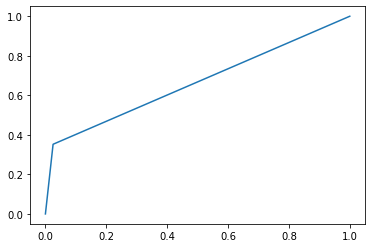

In [86]:
plt.plot(fpr1,tpr1)

In [88]:
auc(fpr1,tpr1)

0.6635946381788289

In [90]:
y.value_count()

AttributeError: 'Series' object has no attribute 'value_count'